# ESIS Mission Paper

In [1]:
import matplotlib.pyplot as plt
import esis

In [2]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [15]:
plt.rcParams['axes.labelsize'] = 'small'
plt.rcParams['xtick.labelsize'] = 'small'
plt.rcParams['ytick.labelsize'] = 'small'
plt.rcParams['legend.fontsize'] = 'small'

In [4]:
level_0 = esis.flight.level_0(caching=True)

<IPython.core.display.Javascript object>


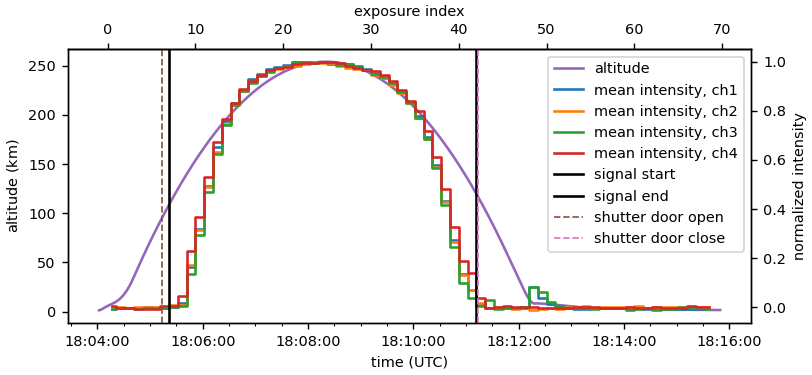

In [16]:
fig_sig_and_alt, ax_altitude = plt.subplots(figsize=(6.5,3), constrained_layout=True)
ax_signal = level_0.plot_altitude_and_signal_vs_time(ax=ax_altitude);
# level_0.timeline.t0.plot(ax=ax_signal, time_start=level_0.time_start)
level_0.timeline.shutter_door_open.plot(ax=ax_signal, time_start=level_0.time_start);
level_0.timeline.shutter_door_close.plot(ax=ax_signal, time_start=level_0.time_start);
fig_sig_and_alt.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax_altitude.transAxes)
fig_sig_and_alt.savefig('figures/signal_and_altitude_vs_time.pdf')